# KoBERT finetuning

## ÌôòÍ≤ΩÏÑ§Ï†ï - python
* python 3.7.0ÏúºÎ°ú ÎßûÏ∂∞Ï£ºÍ∏∞
* gluonnlpÏóêÏÑú ÎÇòÎäî ÏóêÎü¨ÏΩîÎìú : `import gluonnlp as nlp AttributeError: module 'numpy' has no attribute 'bool'.`
    * numpy Î≤ÑÏ†Ñ Îã§Ïö¥Í∑∏Î†àÏù¥Îìú : `!pip install numpy==1.23.1`
    * Ï∞∏Í≥† : [Ïù¥Ïäà Ìï¥Í≤∞ Î∏îÎ°úÍ∑∏](https://sun-garret.tistory.com/42)

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!wget https://www.python.org/ftp/python/3.7.0/Python-3.7.0.tgz
!tar xvfz Python-3.7.0.tgz
!Python-3.7.0/configure
!make
!sudo make install

In [ ]:
!python --version

Python 3.7.0


In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-swwfddmw/kobert-tokenizer_afcde0a6dbb24cae889b5053b8da606d
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-swwfddmw/kobert-tokenizer_afcde0a6dbb24cae889b5053b8da606d
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 5c46b1c68e4755b54879431bd302db621f4d2f47
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=cf524aa0fa174c703c160d37109423ba79b70d141d614718949e56ea622afadb
  Stored in directory: /tmp/pip-ephem-wheel-cache-3llzcwqx/wheels/e9/1a/3f/a864970e8a169c176befa3c4a1e07aa612f69195907a4045fe
Successfully built kobert_tokenizer


In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch

In [ ]:
import torch

print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:2.5.1+cu121
cuda version: 12.1
cudnn version:90100


In [ ]:
!pip install gluonnlp==0.8.0

In [ ]:
!pip install numpy==1.23.1

In [ ]:
import numpy as np

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # Ìè∞Ìä∏ Ï∫êÏãú Ïû¨ÏÑ§Ï†ï

### import

In [ ]:
# Îü∞ÌÉÄÏûÑ Îã§Ïãú ÏãúÏûë ÌõÑ Ïã§Ìñâ
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

/usr/local/lib/python3.10/dist-packages/mxnet/optimizer/optimizer.py:163: UserWarning: WARNING: New optimizer gluonnlp.optimizer.lamb.LAMB is overriding existing optimizer mxnet.optimizer.optimizer.LAMB
  warnings.warn('WARNING: New optimizer %s.%s is overriding '


In [ ]:
import sklearn

In [ ]:
# ‚òÖ Hugging FaceÎ•º ÌÜµÌïú Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Import
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
# GPU ÏÇ¨Ïö© Ïãú
device = torch.device("cuda:0")

In [ ]:
import pandas as pd

## ÏµúÏ¢Ö Data Load

In [ ]:
#Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conv_data = pd.read_csv('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄÎä•/data ÏµúÏ¢Ö/11.04 ÎÖ∏Ïù∏+Ï±óÎ¥á.csv', encoding='cp949')
emer_data = pd.read_csv('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄÎä•/data ÏµúÏ¢Ö/11.25 Îç∞Ïù¥ÌÑ∞ 4Ï∞® Ï¶ùÍ∞ï.csv', encoding='cp949')

In [ ]:
emer_data.shape

(6814, 1)

In [ ]:
emer_data

note
0                         ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ Îßà.
1                       ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.
2                       Ï†ú Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.
3                              ÏÜêÎåÄÏßÄ Îßà.
4                          ÎÇ¥ Î™∏ ÎßåÏßÄÏßÄ Îßà.
...                               ...
6809     ÎàÑÍ∞Ä ÎÇòÌïúÌÖå Ïù¥ÏÉÅÌïú ÎßêÏùÑ ÌñàÏñ¥Ïöî. Í≤ΩÏ∞∞ Î∂àÎü¨Ï£ºÏÑ∏Ïöî.
6810     Í≤ΩÏ∞∞Ïù¥ ÏôÄÏïº Ïù¥ ÏÉÅÌô©ÏùÑ Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÏïÑÏöî.
6811  Ï†ÄÍ∏∞ ÏàòÏÉÅÌïú ÏÇ¨ÎûåÏùÑ Îî∞ÎùºÍ∞ÄÏïº Ìï†ÍπåÏöî? Í≤ΩÏ∞∞Ïóê ÏïåÎ†§ÏïºÍ≤†Ï£†?
6812              Í≤ΩÏ∞∞Ïóê Ïã†Í≥†ÌïòÏÑ∏Ïöî. Ïù¥Í±¥ ÏúÑÌóòÌï¥Ïöî.
6813            ÎàÑÍµ∞Í∞Ä ÏûêÍæ∏ Îî∞ÎùºÏôÄÏöî. Í≤ΩÏ∞∞ Î∂ÄÎ•¥ÏÑ∏Ïöî.

[6814 rows x 1 columns]

In [ ]:
# conv_data.drop(columns = ['fileNm', 'convrsThema'], inplace=True)
conv_data

stt
0      Í∑∏Í±∞ Î®πÍ≥†ÏÇ¥ÏïÑÏïº ÎêòÎäî Í±∞ÏßÄ ÏûêÏãù Î¨ºÎ†§Ï§Ñ ÌïÑÏöî ÏóÜÍ≥†Ïöî.
1      Í∑∏Í±∏Î°ú Î™®ÏûêÎùºÎäî Î∂ÄÎ∂ÑÏùÄ Îã§Î•∏ Í≥≥ÏóêÏÑú Ï∂©ÎãπÌï¥ÏÑú Ïç®ÏïºÏßÄ.
2        Î∞± ÏÑ∏ ÏãúÎåÄÏù∏Îç∞ ÏöîÏ¶ò ÏûêÏãùÎì§Ïù¥ Î∂ÄÎ™®Í∞Ä ÎèåÎ≥¥Í≤†Ïñ¥Ïöî.
3                  Ïñ¥Î†§Ïö∞Î©¥ ÏûêÍ∏∞Îì§ÎèÑ ÏÇ¥ÏïÑÏïº ÌïòÍ≥†.
4              ÏûêÍ∏∞Îì§ÎèÑ ÏûêÏãù ÌÇ§ÏõåÏïº ÎêòÍ≥† Í∑∏Îü¨ÎãàÍπåÏöî.
...                              ...
25835                  ÏßÑÏã¨ÏúºÎ°ú Îã§Í∞ÄÍ∞Ä Î≥¥ÏÑ∏Ïöî.
25836             Ìã∞Í∞Ä ÎÇòÎãàÍπå ÎààÏπòÍ∞Ä Î≥¥Ïù¥Îäî Í±∞Ï£†.
25837                  ÌõîÏ≥êÎ≥¥Îäî Í±∞ Ìã∞ÎÇòÎÇòÎ¥êÏöî.
25838                         ÏÑ§Î†úÍ≤†Ïñ¥Ïöî.
25839       Ïûò Ìó§Ïñ¥Ïßà Ïàò ÏûàÎäî ÏÇ¨Ïù¥ Ïó¨Î∂ÄÏù∏ Í±∞ Í∞ôÏïÑÏöî.

[25840 rows x 1 columns]

In [ ]:
# 11.04 Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Ï°∞Ï†ï (2Î∞∞ or 3Î∞∞)
conv_data = conv_data[:13000]
conv_data

stt
0      Í∑∏Í±∞ Î®πÍ≥†ÏÇ¥ÏïÑÏïº ÎêòÎäî Í±∞ÏßÄ ÏûêÏãù Î¨ºÎ†§Ï§Ñ ÌïÑÏöî ÏóÜÍ≥†Ïöî.
1      Í∑∏Í±∏Î°ú Î™®ÏûêÎùºÎäî Î∂ÄÎ∂ÑÏùÄ Îã§Î•∏ Í≥≥ÏóêÏÑú Ï∂©ÎãπÌï¥ÏÑú Ïç®ÏïºÏßÄ.
2        Î∞± ÏÑ∏ ÏãúÎåÄÏù∏Îç∞ ÏöîÏ¶ò ÏûêÏãùÎì§Ïù¥ Î∂ÄÎ™®Í∞Ä ÎèåÎ≥¥Í≤†Ïñ¥Ïöî.
3                  Ïñ¥Î†§Ïö∞Î©¥ ÏûêÍ∏∞Îì§ÎèÑ ÏÇ¥ÏïÑÏïº ÌïòÍ≥†.
4              ÏûêÍ∏∞Îì§ÎèÑ ÏûêÏãù ÌÇ§ÏõåÏïº ÎêòÍ≥† Í∑∏Îü¨ÎãàÍπåÏöî.
...                              ...
12995                        Í∞ÄÎä•ÌïòÎã§Î©¥Ïöî.
12996               ÌïòÍ≥† Ïã∂ÏùÄ ÏïåÎ∞î ÏßÄÏõêÌï¥Î≥¥ÏÑ∏Ïöî.
12997                         Îã§ ÏòàÎªêÏöî.
12998            ÏÇ¥Ïßù ÎÇ¥Î†§Î≥¥ÎäîÍ≤ÉÎèÑ Í¥úÏ∞ÆÏùÑÍ±∞ Í∞ôÏïÑÏöî.
12999                      Î≠ò Ìï¥ÎèÑ ÏòàÎªêÏöî.

[13000 rows x 1 columns]

In [ ]:
conv_data.columns = ['text']
conv_data['label'] = 0
conv_data = conv_data.sample(frac=1, random_state=1).reset_index(drop=True) # Ï†ïÏÉÅ ÎåÄÌôî ÏÑûÍ∏∞
conv_data

<ipython-input-13-c39fd0972fab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conv_data['label'] = 0


text  label
0      Ìò∏Î∞òÏùÄ  ÌèâÎãπ Îã®Í∞ÄÍ∞Ä ÏóÑÏ≤≠ ÎπÑÏåÄ Í±∞ÎùºÍ≥† Îì£Í≥† Ï†úÍ∞Ä Î≥¥Í≥† Í∑∏ÎÉ• ÏûäÏñ¥Î≤ÑÎ†∏ÎÑ§Ïöî.      0
1                                     Ïôú ÏßÑÍ∏âÏù¥ Ïïà ÎêòÏßÄ      0
2                    Í∑∏ÎûòÎèÑ Ïã§Ïû•ÎãòÍ≥º Í∞ÑÌò∏ÏÇ¨Îì§Ïù¥ ÏûòÌï¥ Ï§òÏÑú Ï∞∏ Í≥†ÎßôÎã§.      0
3                Í∑ºÎç∞ Ïö∞Î¶¨ ÌÅ∞Ïï† ÎÇ¥Í∞Ä Ïßë ÏÇ¨Ï§Ñ Îïå Ïù¥ Ïã≠Ïò§ ÌèâÏÇ¨ Ï§¨Í±∞Îì†.      0
4                                       Îã§Ïãú ÌÉúÏñ¥ÎÇúÎã§Î©¥      0
...                                          ...    ...
12995                             Ìä∏ÏúÑÌÑ∞ Î≥¥Î©¥ Îã§ ÌñâÎ≥µÌï¥Î≥¥Ïó¨      0
12996                    Ïö∞Î¶¨ Ïã†ÎûëÏù¥ ÏïÑÌôâ Ïãú Î∞òÏóê ÎÇòÍ∞îÏóàÎã§Îäî Îç∞.      0
12997                           Ï†ïÏπòÍ≥† ÍµêÌöåÎèÑ Ïñ¥ÎîîÎì† ÎòëÍ∞ôÏïÑ.      0
12998                                   ÏßÄÍ∏àÎèÑ Í∑∏ÎûòÏöî.      0
12999    Ï†úÍ∞Ä ÏöîÏÉà Îì§Ïñ¥ Î≥¥ÎãàÍπå Îì§Î¶¨Îäî ÏñòÍ∏∞Î°úÎäî Ïñ¥Îñ§ ÏÇ¨ÎûåÏùÄ ÏåçÏ¥åÎèôÏóêÏÑú ÌïúÎåÄÏöî.      0

[13000 rows x 2 columns]

In [ ]:
emer_data.columns = ['text']
emer_data['label'] = 1
emer_data

text  label
0                         ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ Îßà.      1
1                       ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.      1
2                       Ï†ú Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.      1
3                              ÏÜêÎåÄÏßÄ Îßà.      1
4                          ÎÇ¥ Î™∏ ÎßåÏßÄÏßÄ Îßà.      1
...                               ...    ...
6809     ÎàÑÍ∞Ä ÎÇòÌïúÌÖå Ïù¥ÏÉÅÌïú ÎßêÏùÑ ÌñàÏñ¥Ïöî. Í≤ΩÏ∞∞ Î∂àÎü¨Ï£ºÏÑ∏Ïöî.      1
6810     Í≤ΩÏ∞∞Ïù¥ ÏôÄÏïº Ïù¥ ÏÉÅÌô©ÏùÑ Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏùÑ Í≤É Í∞ôÏïÑÏöî.      1
6811  Ï†ÄÍ∏∞ ÏàòÏÉÅÌïú ÏÇ¨ÎûåÏùÑ Îî∞ÎùºÍ∞ÄÏïº Ìï†ÍπåÏöî? Í≤ΩÏ∞∞Ïóê ÏïåÎ†§ÏïºÍ≤†Ï£†?      1
6812              Í≤ΩÏ∞∞Ïóê Ïã†Í≥†ÌïòÏÑ∏Ïöî. Ïù¥Í±¥ ÏúÑÌóòÌï¥Ïöî.      1
6813            ÎàÑÍµ∞Í∞Ä ÏûêÍæ∏ Îî∞ÎùºÏôÄÏöî. Í≤ΩÏ∞∞ Î∂ÄÎ•¥ÏÑ∏Ïöî.      1

[6814 rows x 2 columns]

In [ ]:
dataset_all = pd.concat([emer_data, conv_data])
dataset_all

text  label
0                                  ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ Îßà.      1
1                                ÎÇ¥ Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.      1
2                                Ï†ú Î™∏Ïóê ÏÜêÎåÄÏßÄ ÎßàÏÑ∏Ïöî.      1
3                                       ÏÜêÎåÄÏßÄ Îßà.      1
4                                   ÎÇ¥ Î™∏ ÎßåÏßÄÏßÄ Îßà.      1
...                                        ...    ...
12995                           Ìä∏ÏúÑÌÑ∞ Î≥¥Î©¥ Îã§ ÌñâÎ≥µÌï¥Î≥¥Ïó¨      0
12996                  Ïö∞Î¶¨ Ïã†ÎûëÏù¥ ÏïÑÌôâ Ïãú Î∞òÏóê ÎÇòÍ∞îÏóàÎã§Îäî Îç∞.      0
12997                         Ï†ïÏπòÍ≥† ÍµêÌöåÎèÑ Ïñ¥ÎîîÎì† ÎòëÍ∞ôÏïÑ.      0
12998                                 ÏßÄÍ∏àÎèÑ Í∑∏ÎûòÏöî.      0
12999  Ï†úÍ∞Ä ÏöîÏÉà Îì§Ïñ¥ Î≥¥ÎãàÍπå Îì§Î¶¨Îäî ÏñòÍ∏∞Î°úÎäî Ïñ¥Îñ§ ÏÇ¨ÎûåÏùÄ ÏåçÏ¥åÎèôÏóêÏÑú ÌïúÎåÄÏöî.      0

[19814 rows x 2 columns]

In [ ]:
train_emer = emer_data[:4088]
train_conv = conv_data[:7800]

In [ ]:
test_emer = emer_data[4088:5450]
test_conv = conv_data[7800:10400]

In [ ]:
real_test_emer = emer_data[5450:]
real_test_conv = conv_data[10400:]

In [ ]:
print('== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ==')
print(train_emer.shape)
print(train_conv.shape)

== ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ==
(4088, 2)
(7800, 2)


In [ ]:
print('== Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ==')
print(test_emer.shape)
print(test_conv.shape)

== Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ==
(1362, 2)
(2600, 2)


In [ ]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ≥† ÏÑûÍ∏∞
train_data = pd.concat([train_emer, train_conv])
# random_state 1 --> 100ÏúºÎ°ú Î≥ÄÍ≤Ω
train_data = train_data.sample(frac=1, random_state=100).reset_index(drop=True)
train_data

text  label
0      ÎÇ¥Í∞Ä Í∏∏ÏùÑ Î™∞Îùº Ïôú Í∏∏ ÏûÉÏñ¥? ÎÇ¥Í∞Ä Ïó¨Í∏∞ ÏñºÎßàÎÇò ÏûêÏ£º Îã§ÎÖÄ Í∞ÄÏßÄÍ≥† ÏïÑÎäîÎç∞ ÎÇ¥Í∞Ä Í∏∏ÏùÑ...      1
1                                                      Ìóâ      0
2                                         Îß® Ï≤òÏùåÎ∂ÄÌÑ∞ ÏùºÌïú ÏÇ¨ÎûåÏùÄ.      0
3          ÏÇ¨ÎûåÏù¥ ÏπòÏó¨ Í∞ÄÏßÄÍ≥† ÏïÑÏ†ÄÏî®ÍªòÏÑú 119 Î∂àÎü¨ Îã¨Îùº ÌïòÏÖîÏÑú ÏßÄÍ∏à Ï†ÑÌôî ÎìúÎ¶∞ Í±∞Í±∞Îì†Ïöî.      1
4                                               ÍµêÌöåÏóêÏÑú ÎßåÎÇ¨Ïñ¥      0
...                                                  ...    ...
11883                                Î≥ëÏõêÏóê Ï¢Ä Í∞ÄÏïº Ìï† Í±∞ Í±∞ Í∞ôÏùÄÎç∞.      1
11884                                           Ï†ÄÎ¶¨ Ïïà Í∫ºÏ†∏?      1
11885                                             ÎÇò ÏäπÏßÑÌñàÏñ¥      0
11886                 Í∑∏Î†áÍ≤å ÎßàÏùåÎ®πÍ≥† ÎßêÌï¥Ï§Ä Í≤å Ï†ïÎßêÎ°ú ÎÇ¥Í∞Ä Î™∏ Îëò Î∞îÎ•º Î™®Î•¥Í≤†ÎÑ§.      0
11887                                      Îî¥ Í±∞ Î≠ê Ìï† Ï§Ñ ÏïåÏïÑ?      0

[11888 rows x 2 columns]

In [ ]:
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ≥† ÏÑûÍ∏∞
test_data = pd.concat([test_emer, test_conv])
test_data = test_data.sample(frac=1, random_state=100).reset_index(drop=True)
test_data

text  label
0     Ïôú, Ïôú ÎÇ¥ Î¨ºÍ±¥Ïù¥ ÏÇ¨ÎùºÏ°åÏßÄ? ÎàÑÍ∞Ä ÏÜêÏùÑ ÎåÑ Í±¥Í∞Ä?      1
1          Îèà ÏóÜÎã§Í≥†? Í±∞ÏßìÎßêÏù¥Î©¥ ÎÑ§ Îã§Î¶¨ Î∂ÄÎü¨ÏßÑÎã§.      1
2                       ÏÑ∏ÌÉÅÏÜå Í∞ÄÍ∏∞ Í∑ÄÏ∞ÆÎÑ§      0
3                  ÎÇòÎäî Î™®ÏûêÎûÄ ÏÇ¨ÎûåÏù∏ Í±∞ Í∞ôÏïÑ      0
4             ÎÇ† ÏïÑÎì§Ïù¥ Í∏∞Îã§Î¶¥ ÌÖêÎç∞ Ïñ¥ÎîîÎ°ú Í∞îÏßÄ?      1
...                            ...    ...
3957                       Î∞•ÏÉùÍ∞ÅÏù¥ ÏóÜÏñ¥      0
3958                         Ï†ÅÎãπÌï¥Ïöî.      0
3959                Í±¥Í∞ï ÏÉùÍ∞ÅÌï¥ÏÑú Ï±ôÍ≤®ÎìúÏÑ∏Ïöî.      0
3960                ÏïΩ Î∞îÎ•¥Í≥† ÏñºÎ•∏ ÎÇòÏúºÏÑ∏Ïöî.      0
3961                       Ï†ÅÎãπÌûàÎ•º Î™∞Îùº      0

[3962 rows x 2 columns]

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ≥† ÏÑûÍ∏∞
real_test_data = pd.concat([real_test_emer, real_test_conv])
real_test_data = real_test_data.sample(frac=1, random_state=100).reset_index(drop=True)
real_test_data

text  label
0                  Í∏âÌïú ÏÉÅÌô©ÏûÖÎãàÎã§. Í≤ΩÏ∞∞ÏùÑ Î∂àÎü¨Ï£ºÏÑ∏Ïöî.      1
1               ÏúÑÌóòÏùÑ Í∞êÏßÄÌñàÏñ¥Ïöî. Í≤ΩÏ∞∞Ïóê Ïã†Í≥†Ìï¥ Ï£ºÏÑ∏Ïöî.      1
2          Í∑∏ÎÉ• Î≤ÑÏÑùÎ≤ÑÏÑùÍ±∞Î¶¨Îçò Îç∞ ÏÇ¨ÎûåÎì§Ïù¥ ÏóÑÏ≤≠ Ï¢ãÏïÑÌïòÎçîÎùºÍ≥†.      0
3     Í∑∏ÎûòÏÑú Ïö∞Î¶¨Îäî Ïù¥Ï†ú Ïà† Ìïú Ïûî Î®πÍ≥† Ïù¥Ï†ú Í∏∞Î∂Ñ Ï¢ãÍ≤å ÏûàÎäîÎç∞.      0
4              Î≠îÍ∞Ä Ï∞æÍ≥† Í≥ÑÏã† Í±¥Í∞ÄÏöî? Ï†úÍ∞Ä ÎèÑÏôÄÎìúÎ¶¥Í≤åÏöî.      1
...                                 ...    ...
3959              Í∑∏Îûò Í∞ñÍ≥† ÎÇòÎèÑ Ïã†Í≤Ω Ïïà Ïì∞Í≥† ÎÜîÎëêÏßÄ.      0
3960       ÏàòÏ∞¨Ïù¥Îäî Ïä§ÎãàÏª§Ïä§ Í∞ôÏùÄ Í±¥ Î®πÏñ¥ÎèÑ ÏïÑÎ¨¥Î†áÏßÄÎèÑ ÏïäÎåÄ.      0
3961                    Ïó¨ÏπúÏù¥ ÏÖÄÏπ¥ ÎÑàÎ¨¥ ÎßéÏù¥ Ï∞çÏñ¥      0
3962                   Ïà† Ïïà ÎßàÏÖîÎèÑ ÎÜÄ Ïàò ÏûàÏñ¥Ïöî.      0
3963             Ïù¥ÏÇ¨Î•º Í∞ÄÎ©¥ Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶∞Îã§.      0

[3964 rows x 2 columns]

In [ ]:
train_data['label'].value_counts()

label
0    7800
1    4088
Name: count, dtype: int64

In [ ]:
test_data['label'].value_counts()

label
0    2600
1    1362
Name: count, dtype: int64

In [ ]:
real_test_data['label'].value_counts()

label
0    2600
1    1364
Name: count, dtype: int64

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(real_test_data.shape)

(11888, 2)
(3962, 2)
(3964, 2)


In [ ]:
dataset_train = train_data
dataset_test = test_data
dataset_predict = real_test_data

### Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞

Î∞úÌôî ÏµúÏÜå Í∏∏Ïù¥ : 1
Î∞úÌôî ÏµúÎåÄ Í∏∏Ïù¥ : 21
Î∞úÌôî ÌèâÍ∑† Í∏∏Ïù¥ : 5.638740284647219


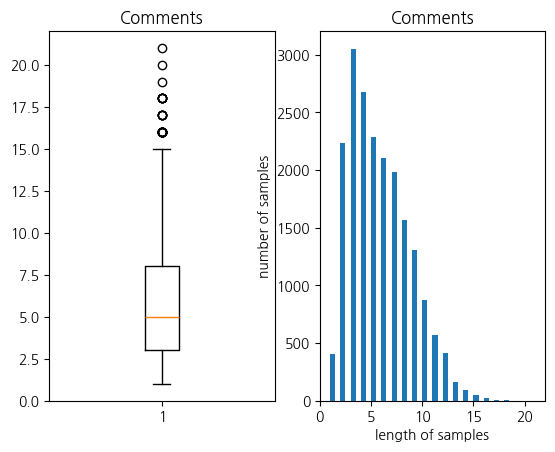

In [ ]:
import matplotlib.pyplot as plt

comments_len = [len(s.split()) for s in dataset_all['text']]

print('Î∞úÌôî ÏµúÏÜå Í∏∏Ïù¥ : {}'.format(np.min(comments_len)))
print('Î∞úÌôî ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(np.max(comments_len)))
print('Î∞úÌôî ÌèâÍ∑† Í∏∏Ïù¥ : {}'.format(np.mean(comments_len)))

plt.subplot(1,2,1)
plt.boxplot(comments_len)
plt.title('Comments')

plt.subplot(1,2,2)
plt.title('Comments')
plt.hist(comments_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# ÏúÑÌóò ÏÉÅÌô©Ïù∏ Í≤ÉÏùò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
true_data = dataset_all[dataset_all['label'] == 1]

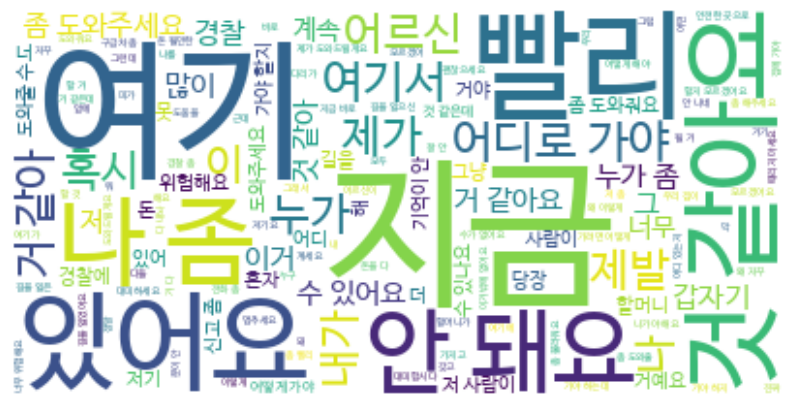

In [ ]:
from wordcloud import WordCloud
from PIL import Image

# bubble_mask = np.array(Image.open('/content/drive/MyDrive/project4/speech-bubble.PNG'))

wordcloud = WordCloud(
                    font_path='NanumBarunGothic',
                    #   mask=bubble_mask,
                      background_color='white')

# true labelÏóê ÎåÄÌïú word cloud ÏÉùÏÑ±
wc_true = wordcloud.generate(' '.join(true_data['text']))

plt.figure(figsize=(10, 10))
plt.imshow(wc_true, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
# Ï†ïÏÉÅ ÏÉÅÌô©Ïù∏ Í≤ÉÏùò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
false_data = dataset_all[dataset_all['label'] == 0]

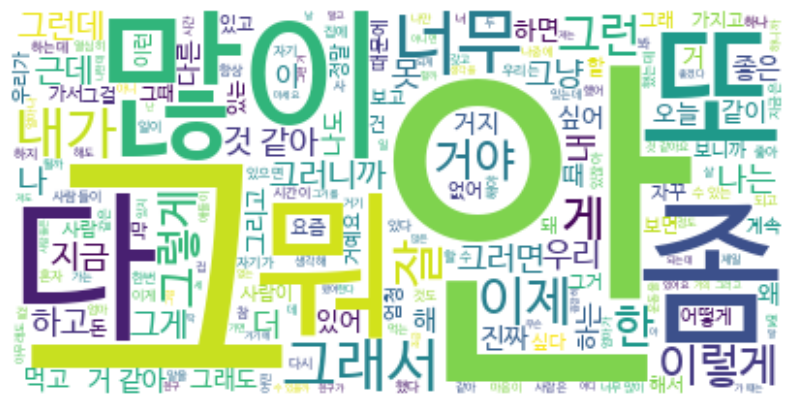

In [ ]:
from wordcloud import WordCloud
from PIL import Image

# bubble_mask = np.array(Image.open('/content/drive/MyDrive/project4/speech-bubble.PNG'))

wordcloud = WordCloud(
                    font_path='NanumBarunGothic',
                    #   mask=bubble_mask,
                      background_color='white')

# false labelÏóê ÎåÄÌïú word cloud ÏÉùÏÑ±
wc_true = wordcloud.generate(' '.join(false_data['text']))

plt.figure(figsize=(10, 10))
plt.imshow(wc_true, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")

plt.show()

## Îç∞Ïù¥ÌÑ∞ÏÖã ÌÜ†ÌÅ∞Ìôî

In [ ]:
# ‚òÖ tokenizer, model Ï†ïÏùò
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Ïûò ÎèôÏûëÌïòÎäîÏßÄ ÌÖåÏä§Ìä∏
from torch import tensor

inputs = tokenizer("Î™©Ï∞®Î•º Î¥§ÏùÑ Îïå Í∏∞ÏñµÏóê Ïò§Îûò ÎÇ®ÏïÑÏöî", return_tensors="pt")
print(inputs)

{'input_ids': tensor([[   2, 2068, 7389, 6116, 2421, 7088, 1844, 1291, 6896, 3422, 1420, 6999,
            3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [ ]:
# ‚òÖ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î¶¨Ïä§Ìä∏Ìôî
train_data_list = []
for q, label in zip(dataset_train['text'], dataset_train['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    train_data_list.append(data)

print(data)
print(train_data_list[:10])

['Îî¥ Í±∞ Î≠ê Ìï† Ï§Ñ ÏïåÏïÑ?', '0']
[['ÎÇ¥Í∞Ä Í∏∏ÏùÑ Î™∞Îùº Ïôú Í∏∏ ÏûÉÏñ¥? ÎÇ¥Í∞Ä Ïó¨Í∏∞ ÏñºÎßàÎÇò ÏûêÏ£º Îã§ÎÖÄ Í∞ÄÏßÄÍ≥† ÏïÑÎäîÎç∞ ÎÇ¥Í∞Ä Í∏∏ÏùÑ Ïôú Î™®Î•¥ÎäîÎç∞.', '1'], ['Ìóâ', '0'], ['Îß® Ï≤òÏùåÎ∂ÄÌÑ∞ ÏùºÌïú ÏÇ¨ÎûåÏùÄ.', '0'], ['ÏÇ¨ÎûåÏù¥ ÏπòÏó¨ Í∞ÄÏßÄÍ≥† ÏïÑÏ†ÄÏî®ÍªòÏÑú 119 Î∂àÎü¨ Îã¨Îùº ÌïòÏÖîÏÑú ÏßÄÍ∏à Ï†ÑÌôî ÎìúÎ¶∞ Í±∞Í±∞Îì†Ïöî.', '1'], ['ÍµêÌöåÏóêÏÑú ÎßåÎÇ¨Ïñ¥', '0'], ['Ï§Ñ Í∏∏Í±∞ Í∞ôÏïÑ', '0'], ['Í∑∏Îü¨ÎãàÍπå Ïï†Îì§ Ïñ¥Î¶¥ Îïå ÎßéÏù¥ Îì§Ïñ¥ÏÑú ÏòÅÌñ•Ïù¥ ÌÅ∞ Í≤É Í∞ôÏïÑ.', '0'], ['Í∑∏Îü¨Î©¥ Í∑∏Îü∞ ÏïÑÏù¥Îì§ÏùÄ Í≥µÎ∂ÄÎ•º ÏãúÏºúÏÑú ÏÇ¨ÌöåÏóêÏÑú Î≠îÍ∞Ä Ìï† Ïàò ÏûàÍ≤å Ìï¥Ïïº ÎêòÎäîÎç∞.', '0'], ['Î©¥ÎèÑÍ∏∞ Îòê ÏÇ¨ÏïºÎèº', '0'], ['Ìï∏ÎìúÌè∞ Ï§ëÎèÖÏù∏ÎìØ', '0']]


In [ ]:
# ‚òÖ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î¶¨Ïä§Ìä∏Ìôî
test_data_list = []
for q, label in zip(dataset_test['text'], dataset_test['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    test_data_list.append(data)

print(data)
print(test_data_list[:10])

['Ï†ÅÎãπÌûàÎ•º Î™∞Îùº', '0']
[['Ïôú, Ïôú ÎÇ¥ Î¨ºÍ±¥Ïù¥ ÏÇ¨ÎùºÏ°åÏßÄ? ÎàÑÍ∞Ä ÏÜêÏùÑ ÎåÑ Í±¥Í∞Ä?', '1'], ['Îèà ÏóÜÎã§Í≥†? Í±∞ÏßìÎßêÏù¥Î©¥ ÎÑ§ Îã§Î¶¨ Î∂ÄÎü¨ÏßÑÎã§.', '1'], ['ÏÑ∏ÌÉÅÏÜå Í∞ÄÍ∏∞ Í∑ÄÏ∞ÆÎÑ§', '0'], ['ÎÇòÎäî Î™®ÏûêÎûÄ ÏÇ¨ÎûåÏù∏ Í±∞ Í∞ôÏïÑ', '0'], ['ÎÇ† ÏïÑÎì§Ïù¥ Í∏∞Îã§Î¶¥ ÌÖêÎç∞ Ïñ¥ÎîîÎ°ú Í∞îÏßÄ?', '1'], ['Îí§Ïóê Í∑∏ Îëê Îèà Î∞ò Ìä∏Îü≠Ïóê Ïû•ÎπÑ Îã§ Ïã£Í≥† Ìè¨ Îã¨Í≥† Îã§ÎãàÍ≥†.', '0'], ['ÏûòÌïòÏã§ Í±∞ÏòàÏöî.', '0'], ['Ïñ¥Î†§ Î≥¥Ïù¥Í≥† Ïã∂Ïñ¥', '0'], ['Îã§Ïù¥Ïñ¥Ìä∏Î•º Ìï¥Î¥êÏöî.', '0'], ['ÏÉà ÏßëÏúºÎ°ú Ïù¥ÏÇ¨ Í∞ÄÍ∏∞Î°ú ÌñàÏñ¥', '0']]


## ÌååÎùºÎØ∏ÌÑ∞ ÏÖãÌåÖ

In [ ]:
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 2
max_grad_norm = 1
log_interval = 200
learning_rate = 3e-5   ## Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌï¥ ÌÖåÏä§Ìä∏ ÌõÑ Ï°∞Ï†ï (5e-5 --> 3e-5)

## Data tokenization, int encoding, padding

### **BERTSentenceTransform ÏóêÎü¨ : Ìï¥Í≤∞**

    
* (1) Ìï¥Îãπ ÌÅ¥ÎûòÏä§Ïùò py ÌååÏùº Í≤ΩÎ°ú Ï∞æÎäî ÏΩîÎìú Ïã§Ìñâ
* (2) Í≤ΩÎ°úÏóê <ÎåÄÎûµ 1220>Î≤àÏß∏Ïóê Ìï¥Îãπ ÌÅ¥ÎûòÏä§ Ï°¥Ïû¨. Î∏îÎ°úÍ∑∏Ïóê ÏûàÎäî ÏΩîÎìúÎ°ú Î≥µÎ∂ôÌï¥ÏÑú ÎåÄÏ≤¥Ìï¥Ï§Ñ Í≤É
    * Ï∞∏Í≥† : [BLOG : BertSentenceTransForm ÏóêÎü¨](https://blog.naver.com/newyearchive/223097878715)
    * **--> ÎåÄÏ≤¥Ìï† ÌïÑÏöî ÏóÜÏù¥ ÏßÅÏ†ë Î∞ë ÏÖÄÏóê Î≥µÎ∂ôÌï¥ÏÑú Ïç®ÎèÑ Í¥úÏ∞ÆÏïÑÏÑú Ïù¥ÎåÄÎ°ú ÏÇ¨Ïö©**
* (3) Ïù¥Ï†† Îã§Ïùå ÏóêÎü¨ Ï°¥Ïû¨ --> GPTÏóêÍ≤å Î¨ºÏñ¥Î≥¥Îãà dfÎ•º ÎÑ£Ïñ¥ÏÑú Í∑∏Î†áÎã§ Ìï®. dfÎ•º Î¶¨Ïä§Ìä∏ÌôîÌï¥Ï§å.
        valueerror: invalid literal for int() with base 10: 'e'
    * Ï∞∏Í≥† : [BLOG : KoBert Îç∞Ïù¥ÌÑ∞ Ïù¥Ìï¥(tsv)](https://steminher.tistory.com/137)




In [ ]:
# (2Î≤à Î∞©Î≤ï. ÏÇ¨Ïö© X)
# # ‚òÖ BERTSentenceTransform ÌÅ¥ÎûòÏä§ ÏóêÎü¨Î°ú ÏàòÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏúÑÏπò Ï∞æÍ∏∞
# import sys
# import inspect

# # Ï∞æÍ≥†Ïûê ÌïòÎäî ÌÅ¥ÎûòÏä§ Ïù¥Î¶Ñ
# class_name = "BERTSentenceTransform"

# # sys.modulesÏóêÏÑú Î™®Îì† Î°úÎìúÎêú Î™®ÎìàÏùÑ ÏàúÌöåÌïòÎ©∞ ÌÅ¥ÎûòÏä§Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
# for module_name, module in sys.modules.items():
#     if hasattr(module, class_name):
#         # ÌÅ¥ÎûòÏä§Í∞Ä Î∞úÍ≤¨ÎêòÎ©¥ Ìï¥Îãπ Î™®ÎìàÏóêÏÑú ÌÅ¥ÎûòÏä§ Ï†ïÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ï∂úÎ†•
#         cls = getattr(module, class_name)
#         print(f"Class {class_name} found in module: {module_name}")
#         print(f"Class definition file: {inspect.getfile(cls)}")
#         break
# else:
#     print(f"Class {class_name} not found in any loaded modules.")

In [ ]:
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')

### BERTDataset

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

# BERTDataset : Í∞Å Îç∞Ïù¥ÌÑ∞Í∞Ä BERT Î™®Îç∏Ïùò ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞à Ïàò ÏûàÎèÑÎ°ù
# tokenization, int encoding, paddingÌïòÎäî Ìï®Ïàò
data_train = BERTDataset(train_data_list, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(test_data_list, 0, 1, tokenizer, vocab, max_len, True, False)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
# torch ÌòïÏãùÏùò datasetÏùÑ ÎßåÎì§Ïñ¥ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨ ÎßàÎ¨¥Î¶¨
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size = batch_size, num_workers = 5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size = batch_size, num_workers = 5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Kobert Î™®Îç∏ Íµ¨ÌòÑ

## Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 2,   # Î∂ÑÎ•òÌï† ÌÅ¥ÎûòÏä§ ÏàòÎ°ú Ï°∞Ï†ï
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

optimizerÏôÄ schedule ÏÑ§Ï†ï

In [ ]:
# BERT  Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ (Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌï¥ ÌÖåÏä§Ìä∏ ÌõÑ ÎìúÎ°≠ÏïÑÏõÉ Ï°∞Ï†ï. 0.5 --> 0.6)
model = BERTClassifier(bertmodel, dr_rate = 0.6).to(device)

In [ ]:
# optimizerÏôÄ schedule ÏÑ§Ï†ï
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]


optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # Îã§Ï§ëÎ∂ÑÎ•òÎ•º ÏúÑÌïú loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)

# calc_accuracy : Ï†ïÌôïÎèÑ Ï∏°Ï†ïÏùÑ ÏúÑÌïú Ìï®Ïàò
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

train_dataloader

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## ÌïôÏäµ

In [ ]:
# ÌïôÏäµ ÏΩîÎìú (ÌïôÏäµ Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ listÏóê Îã¥Ïùå)

train_losses = []
train_accuracies = []
test_accuracies = []
test_losses = []  ### Ï∂îÍ∞Ä: Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

for e in range(num_epochs):
    train_acc = 0.0
    train_loss = 0.0
    test_acc = 0.0
    test_loss = 0.0  ### Ï∂îÍ∞Ä: Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)

        train_loss += loss.item()

        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))

     # ÏóêÌè¨ÌÅ¨Î≥Ñ ÌèâÍ∑† ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑÎ•º Ï†ÄÏû•
    avg_train_loss = train_loss / len(train_dataloader)
    avg_train_acc = train_acc / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)


    # print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    print("epoch {} train acc {} train loss {}".format(e+1, avg_train_acc, avg_train_loss))

    model.eval()

    with torch.no_grad():
        for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
            token_ids = token_ids.long().to(device)
            segment_ids = segment_ids.long().to(device)
            valid_length= valid_length
            label = label.long().to(device)
            out = model(token_ids, valid_length, segment_ids)
            test_loss += loss_fn(out, label).item()  # Í≤ÄÏ¶ù ÏÜêÏã§ Í≥ÑÏÇ∞
            test_acc += calc_accuracy(out, label)

    avg_test_acc = test_acc / len(test_dataloader)
    avg_test_loss = test_loss / len(test_dataloader)  # ÌèâÍ∑† Í≤ÄÏ¶ù ÏÜêÏã§ Í≥ÑÏÇ∞
    test_accuracies.append(avg_test_acc)
    test_losses.append(avg_test_loss)  # Ï∂îÍ∞Ä: Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä

    # print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    # print("epoch {} test acc {}".format(e+1, avg_test_acc))
    print("epoch {} test acc {} test loss {}".format(e+1, avg_test_acc, avg_test_loss))  # Ï∂îÍ∞Ä: Í≤ÄÏ¶ù ÏÜêÏã§ Ï∂úÎ†•


<ipython-input-91-b38f59f3db14>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/186 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 1 batch id 1 loss 0.37594592571258545 train acc 0.96875
epoch 1 train acc 0.9812107974910395 train loss 0.09585954461957738


<ipython-input-91-b38f59f3db14>:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 1 test acc 0.9684197719688543 test loss 0.1043394370560324


  0%|          | 0/186 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.04052191972732544 train acc 0.984375
epoch 2 train acc 0.9969758064516129 train loss 0.015154863705217679


  0%|          | 0/62 [00:00<?, ?it/s]

epoch 2 test acc 0.983062778086763 test loss 0.07517058361178985


In [ ]:
train_accuracies

[0.9812107974910395, 0.9969758064516129]

In [ ]:
test_accuracies

[0.9684197719688543, 0.983062778086763]

In [ ]:
train_losses

[0.09585954461957738, 0.015154863705217679]

In [ ]:
test_losses

[0.1043394370560324, 0.07517058361178985]

In [ ]:
# accuracy & loss Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò Î∞è Ï†ÄÏû•

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_history = pd.DataFrame({
    'epoch': range(1, num_epochs + 1),
    'loss': train_losses,
    'val_loss': test_losses,
    'accuracy': train_accuracies,
    'val_accuracy': test_accuracies
})
df_history.set_index(keys='epoch', inplace = True)
df_history

loss  val_loss  accuracy  val_accuracy
epoch                                            
1      0.095860  0.104339  0.981211      0.968420
2      0.015155  0.075171  0.996976      0.983063

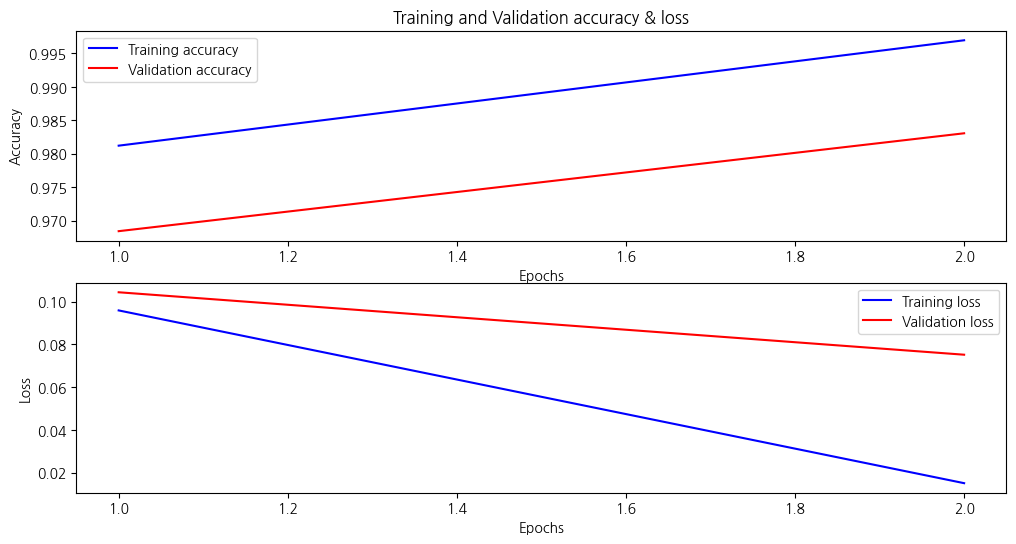

In [ ]:
# ÌïôÏäµ Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# plt.figure(figsize=(12, 6))
fig = plt.figure(figsize=(12, 6))
# fig.tight_layout()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ Í≥°ÏÑ†
plt.subplot(2, 1, 1)
plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
plt.plot(epochs, test_accuracies, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy & loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# ÌïôÏäµ Î∞è Í≤ÄÏ¶ù ÏÜêÏã§ Í≥°ÏÑ†
plt.subplot(2, 1, 2)  ### Ï∂îÍ∞Ä: ÌïôÏäµ ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú ÏÑúÎ∏åÌîåÎ°Ø
plt.plot(epochs, train_losses, 'b', label='Training loss')
plt.plot(epochs, test_losses, 'r', label='Validation loss')  ### Ï∂îÍ∞Ä: Í≤ÄÏ¶ù ÏÜêÏã§ Í≥°ÏÑ†
# plt.title('Training and Validation loss')  ### Ï∂îÍ∞Ä: ÏÜêÏã§ Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

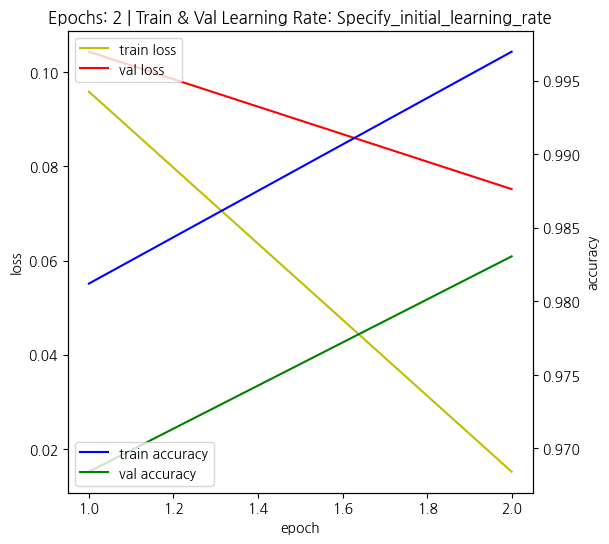

In [ ]:
import matplotlib.pyplot as plt

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, loss_ax = plt.subplots(figsize=(6, 6))
acc_ax = loss_ax.twinx()

# ÌïôÏäµ ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§
loss_ax.plot(df_history.index, df_history['loss'], 'y', label='train loss')
loss_ax.plot(df_history.index, df_history['val_loss'], 'r', label='val loss')

# ÌïôÏäµ Ï†ïÌôïÎèÑÏôÄ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ
acc_ax.plot(df_history.index, df_history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(df_history.index, df_history['val_accuracy'], 'g', label='val accuracy')

# ÎùºÎ≤® ÏÑ§Ï†ï
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

# Î≤îÎ°Ä ÏúÑÏπò ÏÑ§Ï†ï
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

# Ï†úÎ™© Ï∂îÍ∞Ä
epochs = df_history.index[-1]
init_lr = "Specify_initial_learning_rate"  # Ï¥àÍ∏∞ ÌïôÏäµÎ•† Í∞íÏùÑ ÏßÄÏ†ï
plt.title(f"Epochs: {epochs} | Train & Val Learning Rate: {init_lr}")

plt.show()


## ÏßÅÏ†ë Î¨∏Ïû• ÎÑ£Ïñ¥ ÌÖåÏä§Ìä∏

In [ ]:
def predict(predict_sentence): # input = Í∞êÏ†ïÎ∂ÑÎ•òÌïòÍ≥†Ïûê ÌïòÎäî sentence

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False) # ÌÜ†ÌÅ∞ÌôîÌïú Î¨∏Ïû•
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size = batch_size, num_workers = 5) # torch ÌòïÏãù Î≥ÄÌôò

    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length = valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval = []
        for i in out: # out = model(token_ids, valid_length, segment_ids)
            logits = i
            logits = logits.detach().cpu().numpy()
            print(logits)

            if np.argmax(logits) == 0:
                test_eval.append("Ï†ïÏÉÅ ÏÉÅÌô©üå±")
            elif np.argmax(logits) == 1:
                test_eval.append("ÏúÑÌóò ÏÉÅÌô©‚ö°")

        print(">> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ \"" + test_eval[0] + "\"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. ")

In [ ]:
# ÏßàÎ¨∏Ïóê 0 ÏûÖÎ†• Ïãú Ï¢ÖÎ£å
end = 1
while end == 1 :
    sentence = input("ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ")
    if sentence == "0" :
        break
    predict(sentence)
    print("\n")

# ÏòàÏ∏°

## ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [ ]:
# ‚òÖ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î¶¨Ïä§Ìä∏Ìôî
predict_data_list = []
for q, label in zip(dataset_predict['text'], dataset_predict['label'])  :
    data = []
    data.append(q)
    data.append(str(label))

    predict_data_list.append(data)

print(data)
print(predict_data_list[:10])

['Ïù¥ÏÇ¨Î•º Í∞ÄÎ©¥ Ï∂úÌá¥Í∑º ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ Í±∏Î¶∞Îã§.', '0']
[['Í∏âÌïú ÏÉÅÌô©ÏûÖÎãàÎã§. Í≤ΩÏ∞∞ÏùÑ Î∂àÎü¨Ï£ºÏÑ∏Ïöî.', '1'], ['ÏúÑÌóòÏùÑ Í∞êÏßÄÌñàÏñ¥Ïöî. Í≤ΩÏ∞∞Ïóê Ïã†Í≥†Ìï¥ Ï£ºÏÑ∏Ïöî.', '1'], ['Í∑∏ÎÉ• Î≤ÑÏÑùÎ≤ÑÏÑùÍ±∞Î¶¨Îçò Îç∞ ÏÇ¨ÎûåÎì§Ïù¥ ÏóÑÏ≤≠ Ï¢ãÏïÑÌïòÎçîÎùºÍ≥†.', '0'], ['Í∑∏ÎûòÏÑú Ïö∞Î¶¨Îäî Ïù¥Ï†ú Ïà† Ìïú Ïûî Î®πÍ≥† Ïù¥Ï†ú Í∏∞Î∂Ñ Ï¢ãÍ≤å ÏûàÎäîÎç∞.', '0'], ['Î≠îÍ∞Ä Ï∞æÍ≥† Í≥ÑÏã† Í±¥Í∞ÄÏöî? Ï†úÍ∞Ä ÎèÑÏôÄÎìúÎ¶¥Í≤åÏöî.', '1'], ['Í∑∏Î†áÏßÄ Ïö∞Î¶¨ÎÇòÎùºÎèÑ Î∞îÎÄåÍ∏∞Îäî Ìï¥Ïïº ÎêòÎäîÎç∞.', '0'], ['Ïñ¥ÎîîÏÑúÎ∂ÄÌÑ∞ ÏûòÎ™ªÎêú Í±∏Íπå', '0'], ['ÏÜçÏïòÎÇò', '0'], ['Í∑∏ÎïåÎäî Ïö∞Î¶¨Í∞Ä ÌòïÏ†úÎì§Ïù¥ Îã§ÏÑØ Î™Ö  Ïó¨ÏÑØ Î™Ö Ïù¥Î†áÍ≤å ÎêòÍ≥† ÌñàÏóàÏûñÏïÑ.', '0'], ['ÎåÄÎÜìÍ≥† ÎßêÌñàÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥', '0']]


In [ ]:
# BERTDataset : Í∞Å Îç∞Ïù¥ÌÑ∞Í∞Ä BERT Î™®Îç∏Ïùò ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞à Ïàò ÏûàÎèÑÎ°ù tokenization, int encoding, paddingÌïòÎäî Ìï®Ïàò
data_predict = BERTDataset(predict_data_list, 0, 1, tokenizer, vocab, max_len, True, False)

In [ ]:
# torch ÌòïÏãùÏùò datasetÏùÑ ÎßåÎì§Ïñ¥ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤òÎ¶¨ ÎßàÎ¨¥Î¶¨
predict_dataloader = torch.utils.data.DataLoader(data_predict, batch_size = batch_size, num_workers = 5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
all_predictions = []
test_acc = 0.0
total_loss = 0.0

model.eval()
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(predict_dataloader)):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)

    # Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í≥ÑÏÇ∞
    test_acc += calc_accuracy(out, label)
    loss = loss_fn(out, label)  # Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Î†àÏù¥Î∏îÎ°ú ÏÜêÏã§ Í≥ÑÏÇ∞
    total_loss += loss.item()  # ÏÜêÏã§ Í∞íÏùÑ ÎàÑÏ†Å

    predictions = torch.argmax(out, dim=-1)
    all_predictions.extend(predictions.cpu().numpy())
print("prediction acc {}".format(test_acc / (batch_id+1)))
print("prediction loss {}".format(total_loss / (batch_id+1)))

<ipython-input-108-25e690604f27>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(predict_dataloader)):


  0%|          | 0/62 [00:00<?, ?it/s]

prediction acc 0.9609038978494624
prediction loss 0.20386310878975858


In [ ]:
# Í≤∞Í≥ºÎ•º DataFrameÏóê Ï∂îÍ∞Ä
dataset_predict['predicted_label'] = all_predictions

## ÌòºÎèôÌñâÎ†¨ & f1Ï†êÏàò

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(dataset_predict['label'], dataset_predict['predicted_label']))

cm=confusion_matrix(dataset_predict['label'], dataset_predict['predicted_label'])
cm

0.9608980827447023


array([[2551,   49],
       [ 106, 1258]])

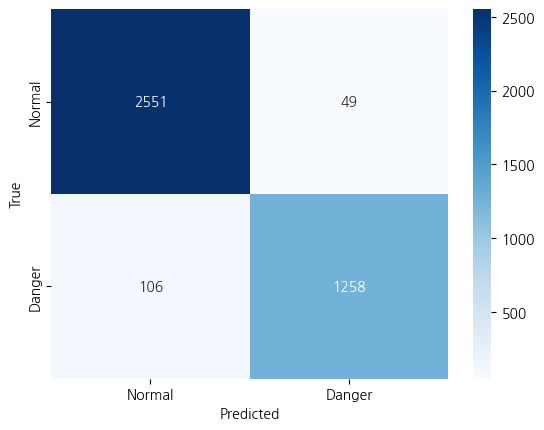

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ÏòàÏ∏° Í≤∞Í≥º & Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
true_labels = dataset_predict['label'].tolist()
predicted_labels = dataset_predict['predicted_label'].tolist()
cm = confusion_matrix(true_labels, predicted_labels)

# ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Danger'], yticklabels=['Normal', 'Danger'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Danger']))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97      2600
      Danger       0.96      0.92      0.94      1364

    accuracy                           0.96      3964
   macro avg       0.96      0.95      0.96      3964
weighted avg       0.96      0.96      0.96      3964



## predict Îç∞Ïù¥ÌÑ∞ - ÏûòÎ™ª ÏòàÏ∏°Îêú Í≤É

In [ ]:
# ÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
incorrect_predictions = dataset_predict[dataset_predict['label'] != dataset_predict['predicted_label']]

# ÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•
print("ÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞:")
print(incorrect_predictions)

# ÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
incorrect_count = len(incorrect_predictions)
print(f"\nÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {incorrect_count}")

ÏûòÎ™ª ÏòàÏ∏°Îêú Îç∞Ïù¥ÌÑ∞:
                             text  label  predicted_label
19            Ïñ¥ Í∑∏Îûò ÎÑà ÎÇòÏ§ëÏóê ÎÇòÌïúÌÖå Ï¢Ä ÎßûÏûê      1                0
39                 Ïò§ÎûúÎßåÏóê Ìûò Ï¢Ä Ïç®ÏïºÌïòÎÑ§.      1                0
58          Ïù¥ ÏÉàÎÅº Í∑Ä ÎúØÏñ¥ÏÑú Î≤ΩÏóê Í±∏Ïñ¥ÎÜÄÎùºÎãàÍπê.      1                0
127   Ïïº ÎÇò Ïò§Îäò ÏßÄÍ∞ëÏùÑ ÏïàÍ∞ÄÏ†∏ÏôîÎäîÎç∞ 5ÎßåÏõêÎßå ÎπåÎ†§Ï£ºÎùº      1                0
147            Î®∏Î¶¨Í∞Ä ÎùµÌïúÍ≤å Ìïú ÎåÄ ÎßûÏùÄÍ±∞ Í∞ôÏïÑ      0                1
...                           ...    ...              ...
3869           Ï†ÑÌôîÎäî Ïôú Í∞ñÍ≥† Îã§ÎÖÄ. ÏïàÎ∞õÏúºÎ©¥ÏÑú      0                1
3887                   ÏúºÏù¥Íµ¨ Î≥ëÏã† ÏÉàÎÅº!      1                0
3894           Ïä§Ìä∏Î†àÏä§ Î∞õÏúºÏãúÎäî Ïùº ÏûàÏúºÏã†Í±∞Ï£†.      0                1
3926                ÏπºÎ°ú Ïë§ÏãúÎäî ÎßõÏù¥ ÏûàÍ±∞Îì†      1                0
3947                 Ïù¥Í±∞ Ï†ïÎßê ÌÅ∞ÏùºÏù¥ÎÑ§Ïöî.      0                1

[155 rows x 3 columns]

Ïûò

In [ ]:
incorrect_predictions

text  label  predicted_label
19            Ïñ¥ Í∑∏Îûò ÎÑà ÎÇòÏ§ëÏóê ÎÇòÌïúÌÖå Ï¢Ä ÎßûÏûê      1                0
39                 Ïò§ÎûúÎßåÏóê Ìûò Ï¢Ä Ïç®ÏïºÌïòÎÑ§.      1                0
58          Ïù¥ ÏÉàÎÅº Í∑Ä ÎúØÏñ¥ÏÑú Î≤ΩÏóê Í±∏Ïñ¥ÎÜÄÎùºÎãàÍπê.      1                0
127   Ïïº ÎÇò Ïò§Îäò ÏßÄÍ∞ëÏùÑ ÏïàÍ∞ÄÏ†∏ÏôîÎäîÎç∞ 5ÎßåÏõêÎßå ÎπåÎ†§Ï£ºÎùº      1                0
147            Î®∏Î¶¨Í∞Ä ÎùµÌïúÍ≤å Ìïú ÎåÄ ÎßûÏùÄÍ±∞ Í∞ôÏïÑ      0                1
...                           ...    ...              ...
3869           Ï†ÑÌôîÎäî Ïôú Í∞ñÍ≥† Îã§ÎÖÄ. ÏïàÎ∞õÏúºÎ©¥ÏÑú      0                1
3887                   ÏúºÏù¥Íµ¨ Î≥ëÏã† ÏÉàÎÅº!      1                0
3894           Ïä§Ìä∏Î†àÏä§ Î∞õÏúºÏãúÎäî Ïùº ÏûàÏúºÏã†Í±∞Ï£†.      0                1
3926                ÏπºÎ°ú Ïë§ÏãúÎäî ÎßõÏù¥ ÏûàÍ±∞Îì†      1                0
3947                 Ïù¥Í±∞ Ï†ïÎßê ÌÅ∞ÏùºÏù¥ÎÑ§Ïöî.      0                1

[155 rows x 3 columns]

## Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÌòºÎèôÌñâÎ†¨

In [ ]:
test_dataloader

In [ ]:
dataset_test

text  label  predicted_label
0     Ïôú, Ïôú ÎÇ¥ Î¨ºÍ±¥Ïù¥ ÏÇ¨ÎùºÏ°åÏßÄ? ÎàÑÍ∞Ä ÏÜêÏùÑ ÎåÑ Í±¥Í∞Ä?      1                1
1          Îèà ÏóÜÎã§Í≥†? Í±∞ÏßìÎßêÏù¥Î©¥ ÎÑ§ Îã§Î¶¨ Î∂ÄÎü¨ÏßÑÎã§.      1                1
2                       ÏÑ∏ÌÉÅÏÜå Í∞ÄÍ∏∞ Í∑ÄÏ∞ÆÎÑ§      0                0
3                  ÎÇòÎäî Î™®ÏûêÎûÄ ÏÇ¨ÎûåÏù∏ Í±∞ Í∞ôÏïÑ      0                0
4             ÎÇ† ÏïÑÎì§Ïù¥ Í∏∞Îã§Î¶¥ ÌÖêÎç∞ Ïñ¥ÎîîÎ°ú Í∞îÏßÄ?      1                1
...                            ...    ...              ...
3957                       Î∞•ÏÉùÍ∞ÅÏù¥ ÏóÜÏñ¥      0                0
3958                         Ï†ÅÎãπÌï¥Ïöî.      0                0
3959                Í±¥Í∞ï ÏÉùÍ∞ÅÌï¥ÏÑú Ï±ôÍ≤®ÎìúÏÑ∏Ïöî.      0                0
3960                ÏïΩ Î∞îÎ•¥Í≥† ÏñºÎ•∏ ÎÇòÏúºÏÑ∏Ïöî.      0                0
3961                       Ï†ÅÎãπÌûàÎ•º Î™∞Îùº      0                0

[3962 rows x 3 columns]

In [ ]:
all_predictions = []
test_acc = 0.0
total_loss = 0.0

model.eval()
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)

    # Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í≥ÑÏÇ∞
    test_acc += calc_accuracy(out, label)
    loss = loss_fn(out, label)  # Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÏôÄ Ïã§Ï†ú Î†àÏù¥Î∏îÎ°ú ÏÜêÏã§ Í≥ÑÏÇ∞
    total_loss += loss.item()  # ÏÜêÏã§ Í∞íÏùÑ ÎàÑÏ†Å

    predictions = torch.argmax(out, dim=-1)
    all_predictions.extend(predictions.cpu().numpy())
print("valid acc {}".format(test_acc / (batch_id+1)))
print("valid loss {}".format(total_loss / (batch_id+1)))

<ipython-input-117-c1b0c5e5b177>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/62 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


valid acc 0.983062778086763
valid loss 0.07517058361178985


In [ ]:
# Í≤∞Í≥ºÎ•º DataFrameÏóê Ï∂îÍ∞Ä
dataset_test['predicted_label'] = all_predictions

In [ ]:
dataset_test

text  label  predicted_label
0     Ïôú, Ïôú ÎÇ¥ Î¨ºÍ±¥Ïù¥ ÏÇ¨ÎùºÏ°åÏßÄ? ÎàÑÍ∞Ä ÏÜêÏùÑ ÎåÑ Í±¥Í∞Ä?      1                1
1          Îèà ÏóÜÎã§Í≥†? Í±∞ÏßìÎßêÏù¥Î©¥ ÎÑ§ Îã§Î¶¨ Î∂ÄÎü¨ÏßÑÎã§.      1                1
2                       ÏÑ∏ÌÉÅÏÜå Í∞ÄÍ∏∞ Í∑ÄÏ∞ÆÎÑ§      0                0
3                  ÎÇòÎäî Î™®ÏûêÎûÄ ÏÇ¨ÎûåÏù∏ Í±∞ Í∞ôÏïÑ      0                0
4             ÎÇ† ÏïÑÎì§Ïù¥ Í∏∞Îã§Î¶¥ ÌÖêÎç∞ Ïñ¥ÎîîÎ°ú Í∞îÏßÄ?      1                1
...                            ...    ...              ...
3957                       Î∞•ÏÉùÍ∞ÅÏù¥ ÏóÜÏñ¥      0                0
3958                         Ï†ÅÎãπÌï¥Ïöî.      0                0
3959                Í±¥Í∞ï ÏÉùÍ∞ÅÌï¥ÏÑú Ï±ôÍ≤®ÎìúÏÑ∏Ïöî.      0                0
3960                ÏïΩ Î∞îÎ•¥Í≥† ÏñºÎ•∏ ÎÇòÏúºÏÑ∏Ïöî.      0                0
3961                       Ï†ÅÎãπÌûàÎ•º Î™∞Îùº      0                0

[3962 rows x 3 columns]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(dataset_test['label'], dataset_test['predicted_label']))

cm=confusion_matrix(dataset_test['label'], dataset_test['predicted_label'])
cm

0.9830893488137304


array([[2556,   44],
       [  23, 1339]])

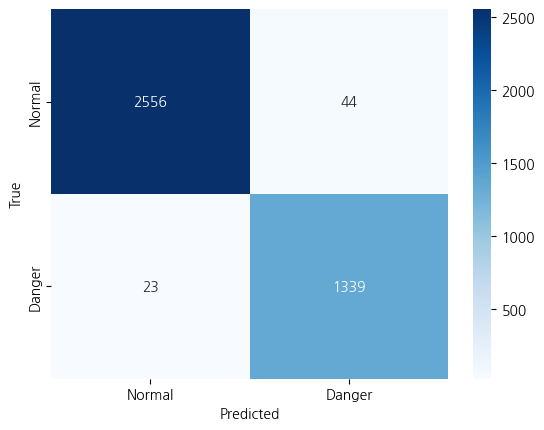

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

true_labels = dataset_test['label'].tolist()
predicted_labels = dataset_test['predicted_label'].tolist().
cm = confusion_matrix(true_labels, predicted_labels)

# ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Danger'], yticklabels=['Normal', 'Danger'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Î∂ÑÎ•ò Î≥¥Í≥†ÏÑú Ï∂úÎ†•
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Danger']))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99      2600
      Danger       0.97      0.98      0.98      1362

    accuracy                           0.98      3962
   macro avg       0.98      0.98      0.98      3962
weighted avg       0.98      0.98      0.98      3962



## ROC-AUC Í∞í

<ipython-input-123-8534c71c5ff2>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(predict_dataloader)):


  0%|          | 0/62 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


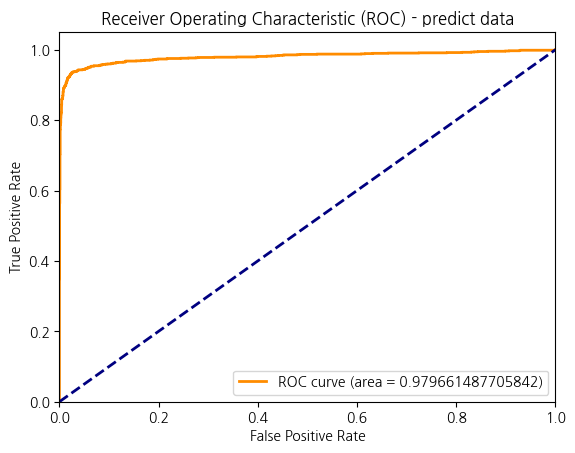

ROC-AUC: 0.979661487705842


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ÏòàÏ∏° ÌôïÎ•†Í≥º Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
all_probs = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(predict_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length.to(device)
        label = label.long().to(device)

        # Î™®Îç∏ ÏòàÏ∏°
        out = model(token_ids, valid_length, segment_ids)

        # softmaxÎ•º ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ ÌôïÎ•† Í≥ÑÏÇ∞
        probs = F.softmax(out, dim=1)

        # ÌÅ¥ÎûòÏä§(1)Ïùò ÌôïÎ•†Îßå Ï†ÄÏû•
        all_probs.extend(probs[:, 1].cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.15f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - predict data')
plt.legend(loc="lower right")
plt.show()

# AUC Í∞í Ï∂úÎ†•
print(f"ROC-AUC: {roc_auc:.15f}")

<ipython-input-124-367aa67ff68e>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/186 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


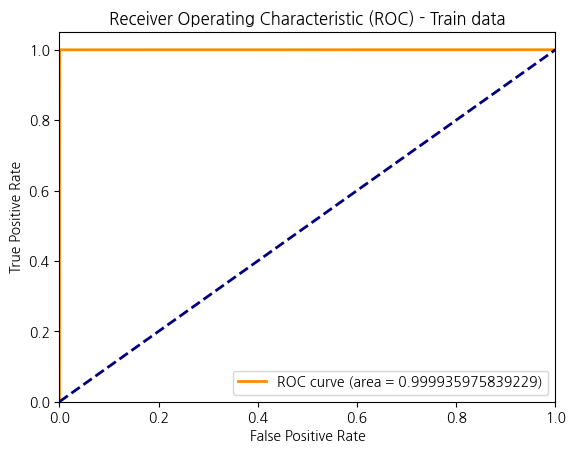

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ROC-AUC: 0.999935975839229


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ÏòàÏ∏° ÌôïÎ•†Í≥º Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
all_probs = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length.to(device)
        label = label.long().to(device)

        # Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏòàÏ∏°Í∞í ÏñªÍ∏∞
        out = model(token_ids, valid_length, segment_ids)

        # softmaxÎ•º ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ ÌôïÎ•† Í≥ÑÏÇ∞
        probs = F.softmax(out, dim=1)

        # ÌÅ¥ÎûòÏä§(1)Ïùò ÌôïÎ•†Îßå Ï†ÄÏû•
        all_probs.extend(probs[:, 1].cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.15f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train data')
plt.legend(loc="lower right")
plt.show()

# AUC Í∞í Ï∂úÎ†•
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ROC-AUC: {roc_auc:.15f}")

<ipython-input-125-4b8b54851bf7>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/62 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


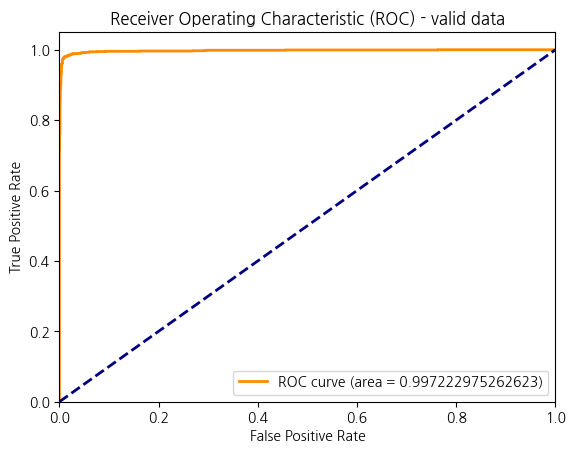

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ROC-AUC: 0.997222975262623


In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ÏòàÏ∏° ÌôïÎ•†Í≥º Ïã§Ï†ú Î†àÏù¥Î∏îÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
all_probs = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length.to(device)
        label = label.long().to(device)

        # Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏòàÏ∏°Í∞í ÏñªÍ∏∞
        out = model(token_ids, valid_length, segment_ids)

        # softmaxÎ•º ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ ÌôïÎ•† Í≥ÑÏÇ∞
        probs = F.softmax(out, dim=1)

        # ÌÅ¥ÎûòÏä§(1)Ïùò ÌôïÎ•†Îßå Ï†ÄÏû•
        all_probs.extend(probs[:, 1].cpu().numpy())
        all_labels.extend(label.cpu().numpy())

# ROC Í≥°ÏÑ† Í≥ÑÏÇ∞
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = roc_auc_score(all_labels, all_probs)

# ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.15f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - valid data')
plt.legend(loc="lower right")
plt.show()

# AUC Í∞í Ï∂úÎ†•
print(f"Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ROC-AUC: {roc_auc:.15f}")

# ÎìúÎùºÏù¥Î∏åÏóê Î™®Îç∏ Ï†ÄÏû•

In [ ]:
# Î™®Îç∏ Ï†ÄÏû•
torch.save(model.state_dict(), '/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄÎä•/11.05_KoBert_state_dict.pth')

## Ï†ÄÏû•Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
#Íµ¨Í∏ÄÎìúÎùºÏù¥Î∏å Ïó∞Îèô
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 2,   # Î∂ÑÎ•òÌï† ÌÅ¥ÎûòÏä§ ÏàòÎ°ú Ï°∞Ï†ï
                 dr_rate = None,
                 params = None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p = dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict = False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# device = torch.device("cpu")
# GPU ÏÇ¨Ïö© Ïãú
device = torch.device("cuda:0")

In [ ]:
# BERTClassifier Î™®Îç∏ Ï†ïÏùò (Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤òÍ∞Ä Ï†ÄÏû•Îêú Í≤ÉÍ≥º ÎèôÏùºÌï¥Ïïº Ìï®)
# ÎìúÎ°≠ÏïÑÏõÉ ÎπÑÏú® (0.6Î°ú Ï°∞Ï†ï)
model = BERTClassifier(bertmodel, dr_rate=0.6).to(device)

# Ï†ÄÏû•Îêú Î™®Îç∏ ÏÉÅÌÉú Î∂àÎü¨Ïò§Í∏∞
model.load_state_dict(torch.load('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄÎä•/11.05_KoBert_state_dict.pth'))

# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò
model.eval()

<ipython-input-86-3f734a6cd841>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄ

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise

In [ ]:
max_len = 64
batch_size = 64

In [ ]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False) # ÌÜ†ÌÅ∞ÌôîÌïú Î¨∏Ïû•
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size = batch_size, num_workers = 5) # torch ÌòïÏãù Î≥ÄÌôò

    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length = valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        test_eval = []
        for i in out: # out = model(token_ids, valid_length, segment_ids)
            logits = i
            logits = logits.detach().cpu().numpy()
            print(logits)

            if np.argmax(logits) == 0:
                test_eval.append("Ï†ïÏÉÅ ÏÉÅÌô©")
            elif np.argmax(logits) == 1:
                test_eval.append("!!ÏúÑÌóò ÏÉÅÌô©!!")

        print(">> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ \"" + test_eval[0] + "\"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. ")

In [ ]:
sentence = "Ï†êÏã¨ÏùÄ Ï±ôÍ≤ºÏßÄ. ÏÜêÎÖÄÍ∞Ä ÌïôÍµêÏóêÏÑú Îπµ Í∞ÄÏ†∏ÏôÄÏÑú Í∑∏Í±∏Î°ú."
predict(sentence)

[ 4.3698187 -4.178288 ]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "Ï†ïÏÉÅ ÏÉÅÌô©"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


In [ ]:
sentence = "Ïó¨Í∏∞Í∞Ä Ïñ¥ÎîîÏßÄ? Ïù¥Ï™Ω Í≥®Î™©Ïù¥ ÏïÑÎãàÏóàÎÇò. Í∏∏ÏùÑ Î™ª Ï∞æÍ≤†ÎÑ§."
predict(sentence)

[-4.0894     4.0159807]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


In [ ]:
# ÏßàÎ¨∏Ïóê 0 ÏûÖÎ†• Ïãú Ï¢ÖÎ£å
end = 1
while end == 1 :
    sentence = input("ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ")
    if sentence == "0" :
        break
    predict(sentence)
    print("\n")

ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Ï†Ä Î≤îÏ£ÑÏûêÍ∞Ä Ïñ¥Î•¥Ïã†ÏùÑ Í∞ïÏ†úÎ°ú Ï∂îÌñâÌïòÎäî Í±∞ Í∞ôÏïÑÏöî
[-4.12967    4.0369496]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†êÏã¨ ÎìúÏÖ®Ïñ¥Ïöî?
[ 4.3608875 -4.2190266]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "Ï†ïÏÉÅ ÏÉÅÌô©üå±"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Ìï†Î®∏Îãà ÏúÑÌóòÌï¥Ïöî
[ 3.864453 -3.917403]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "Ï†ïÏÉÅ ÏÉÅÌô©üå±"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Ìï†Î®∏Îãà ÏúÑÌóòÌï¥Ïöî!
[-4.246082   4.0319357]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Îî∏ÎÑ§ ÏßëÏóê Í∞àÎùºÍ≥† ÌñàÎäîÎç∞ Ïó¨Í∏∞Í∞Ä Ïñ¥ÎîîÏßÄ?
[-4.1947784  4.064302 ]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§. 


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ÏöîÏ¶òÏóî ÏûÑÏòÅÏõÖÏù∏Í∞Ä Ï¢ãÎçîÎùº.
[ 4.3630767 -4.1535916]
>> ÏûÖÎ†•Ìïò

In [ ]:
### logitsÎßêÍ≥†, ÏÜåÌîÑÌä∏ Îß•Ïä§Î°ú ÌÖåÏä§Ìä∏ÌïòÍ≤åÎÅî ÏàòÏ†ï
import torch
import numpy as np
import torch.nn.functional as F

# ÏÜåÏàòÏ†ê 7ÏûêÎ¶¨Î°ú ÏÑ§Ï†ï
np.set_printoptions(precision=7, suppress=True)

def predict(predict_sentence):  # Í∞êÏ†ï Î∂ÑÎ•òÌïòÍ≥†Ïûê ÌïòÎäî Î¨∏Ïû• ÏûÖÎ†•
    data = [predict_sentence, '0']
    dataset_another = [data]

    # BERTDataset Ìò∏Ï∂úÎ°ú Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî Î∞è Ï≤òÎ¶¨
    another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)

    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        label = label.long().to(device)

        # Î™®Îç∏Î°úÎ∂ÄÌÑ∞ Î°úÏßì(logits) Ï∂úÎ†•
        with torch.no_grad():
            out = model(token_ids, valid_length, segment_ids)

        test_eval = []
        for i in out:  # Í∞Å Ï∂úÎ†•Í∞íÏóê ÎåÄÌï¥
            logits = i.detach().cpu().numpy()  # Î°úÏßìÏùÑ numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
            softmax_output = F.softmax(torch.tensor(logits), dim=-1).numpy()  # Softmax Ï†ÅÏö©ÌïòÏó¨ ÌôïÎ•†Î°ú Î≥ÄÌôò
            print("Logits:", logits)
            print("Softmax Output:", softmax_output)  # SoftmaxÎ°ú Î≥ÄÌôòÎêú Í∞í Ï∂úÎ†•

            if np.argmax(softmax_output) == 0:
                test_eval.append("Ï†ïÏÉÅ ÏÉÅÌô©üå±")
            elif np.argmax(softmax_output) == 1:
                test_eval.append("ÏúÑÌóò ÏÉÅÌô©‚ö°")

        print(">> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ \"" + test_eval[0] + "\"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§.")


In [ ]:
# ÏßàÎ¨∏Ïóê 0 ÏûÖÎ†• Ïãú Ï¢ÖÎ£å
end = 1
while end == 1 :
    sentence = input("ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ")
    if sentence == "0" :
        break
    predict(sentence)
    print("\n")

ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Ìï†Î®∏Îãà ÏúÑÌóòÌï¥Ïöî!
Logits: [-4.246082   4.0319357]
Softmax Output: [0.000254 0.999746]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§.


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†êÏã¨ ÎìúÏÖ®Ïñ¥Ïöî?
Logits: [ 4.3608875 -4.2190266]
Softmax Output: [0.9998122 0.0001878]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "Ï†ïÏÉÅ ÏÉÅÌô©üå±"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§.


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Í≤∞ÌòºÌï† ÎïåÎäî Ï¢ãÏïòÏßÄ
Logits: [ 4.35104   -4.1434755]
Softmax Output: [0.9997955 0.0002045]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "Ï†ïÏÉÅ ÏÉÅÌô©üå±"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§.


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : Îî∏ÎÑ§ ÏßëÏóê Í∞àÎùºÍ≥† ÌñàÎäîÎç∞ Ïó¨Í∏∞Í∞Ä Ïñ¥ÎîîÏßÄ?
Logits: [-4.1947784  4.064302 ]
Softmax Output: [0.0002588 0.9997411]
>> ÏûÖÎ†•ÌïòÏã† ÎÇ¥Ïö©ÏùÄ "ÏúÑÌóò ÏÉÅÌô©‚ö°"ÏúºÎ°ú Î≥¥Ïó¨ÏßëÎãàÎã§.


ÌïòÍ≥†Ïã∂ÏùÄ ÎßêÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî : ÏöîÏ¶òÏóê ÏûÑÏòÅÏõÖÏù∏Í∞Ä Ï¢ãÎçîÎùº.
Logits: [ 4.3629055 -4.154992 ]
Softmax Output: [0.9998

# ÌóàÍπÖÌéòÏù¥Ïä§Ïóê Î™®Îç∏ Ï†ÄÏû•

In [ ]:
!pip install transformers huggingface_hub

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

ÏúÑ Î™ÖÎ†πÏñ¥Î•º Ïã§ÌñâÌïòÎ©¥ Hugging FaceÏóê Î°úÍ∑∏Ïù∏Ìï† Ïàò ÏûàÎäî ÌåùÏóÖÏù¥ ÎúπÎãàÎã§. Ïù¥Îïå, Í∞úÏù∏ Access TokenÏùÑ ÎÑ£Ïñ¥Ï£ºÎ©¥ Îê©ÎãàÎã§.

In [ ]:
import torch
import torch.nn as nn
from transformers import BertModel, BertConfig, PreTrainedModel

class BERTClassifier(PreTrainedModel):
    def __init__(self, bert, hidden_size=768, num_classes=2, dr_rate=None, params=None):
        super(BERTClassifier, self).__init__(config=params)  # configÎ•º Ï†ÑÎã¨ÌïòÏó¨ Ï¥àÍ∏∞Ìôî
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size, num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        _, pooler = self.bert(input_ids=token_ids,
                              token_type_ids=segment_ids.long(),
                              attention_mask=attention_mask.float().to(token_ids.device),
                              return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

# Î™®Îç∏Ïùò ÏÑ§Ï†ïÏùÑ Í∞ÄÏ†∏Ïò§Í∏∞
config = BertConfig.from_pretrained('skt/kobert-base-v1')

# Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌï† Îïå configÎ•º Ï†ÑÎã¨
bert_model = BertModel.from_pretrained('skt/kobert-base-v1', config=config)
model = BERTClassifier(bert_model, params=config)

# Î™®Îç∏ Í∞ÄÏ§ëÏπò Î°úÎìú
model.load_state_dict(torch.load('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏßÄÎä•/11.05_KoBert_state_dict.pth'))

<ipython-input-266-8d66c7233938>:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/2024 ÌïôÍµê/Ï°∏Ïûë Ï§ÄÎπÑ/Ïù∏Í≥µÏ

<All keys matched successfully>

In [ ]:
# Î™®Îç∏ÏùÑ ÌóàÍπÖÌéòÏù¥Ïä§Ïóê ÏóÖÎ°úÎìú (Î™®Îç∏ÏùÑ ÌóàÍπÖÌéòÏù¥Ïä§ÏóêÏÑú ÎßåÎì§Ïñ¥Ï£ºÏßÄ ÎßêÍ≥† Ïã§Ìñâ)
model.push_to_hub("ÌóàÍπÖÌéòÏù¥Ïä§ÎãâÎÑ§ÏûÑ/Ìè¥Îçî")

In [ ]:
# tokenizer.push_to_hub("ÌóàÍπÖÌéòÏù¥Ïä§ÎãâÎÑ§ÏûÑ/Ìè¥Îçî")
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎäî skt-kobertÍªÑ Ïì∞Í∏∞Ïóê ÏóÖÎ°úÎìúÌï† ÌïÑÏöî ÏóÜÏñ¥Î≥¥ÏûÑ

Ï∞∏Í≥† : [ÌóàÍπÖ ÌéòÏù¥Ïä§Ïóê Î™®Îç∏ ÏóÖÎ°úÎìúÌïòÎäî 3Í∞ÄÏßÄ Î∞©Î≤ï Blog](https://zerolang.tistory.com/65)